# Regression

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Model slope:     2.108835241442782
Model intercept: -4.994308342212822


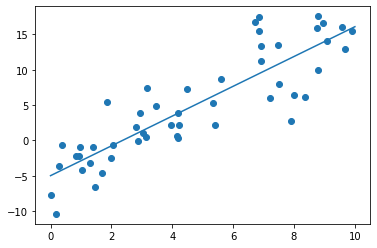

In [2]:
# Simple regression

from sklearn.linear_model import LinearRegression

# Generate points
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + (4 * rng.randn(50))

# Fit
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)

# Predict
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# Coefs
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

# Plot
plt.scatter(x, y);
plt.plot(xfit, yfit);

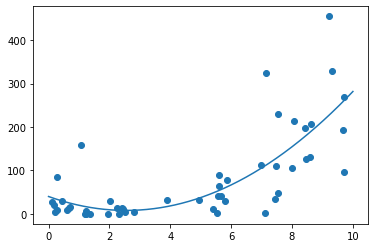

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     17.66
Date:                Thu, 11 Feb 2021   Prob (F-statistic):           1.91e-06
Time:                        13:02:29   Log-Likelihood:                -280.60
No. Observations:                  50   AIC:                             567.2
Df Residuals:                      47   BIC:                             572.9
Df Model:                           2                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0816     15.623      2.566      0.010       9.462      70.701
x1           -25.1428     12.226     -2.056      0.040     -49.106      -1.180
x2             4.9311      1.489      3.312      0.001       2.013       7.849
==============================================================================
Omnibus:                       21.411   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.295
Skew:                           1.257   Prob(JB):                     2.93e-09
Kurtosis:                       6.542   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [3]:
# Multiple regressions

x = 10 * rng.rand(50)
y = np.square(2 * x - 5 + (4 * rng.randn(50)))

x = sm.add_constant(x)
x = np.concatenate([x, (x[:,1] ** 2)[:, np.newaxis]], axis=1)
#x = np.concatenate([x, (x[:,1] ** 3)[:, np.newaxis]], axis=1)

est = sm.OLS(y, x).fit(cov_type='HC2')

xfit = sm.add_constant(np.linspace(0, 10, 1000))
xfit = np.concatenate([xfit, (xfit[:,1] ** 2)[:, np.newaxis]], axis=1)
#xfit = np.concatenate([xfit, (xfit[:,1] ** 3)[:, np.newaxis]], axis=1)
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
ax.scatter(x[:,1], y)
ax.plot(xfit[:,1], yfit)
plt.show()

est.summary()

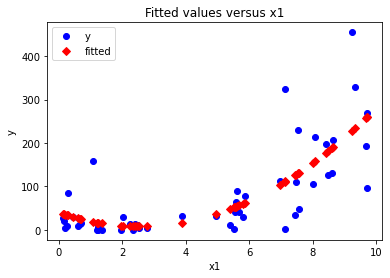

In [4]:
sm.graphics.plot_fit(est, 'x1', vlines=False).show()

## Matrix form regression

We can solve for the procedure for finding $\beta$. You don't need to understand everything here, but we'll quickly run through the procedure. Set up the minimum problem to find $\beta$ that minimizes:

$$ min_\beta (\beta \cdot X - y)^2$$

The first derivative is set to zero to find the minimum point in the equation:

$$ X^T(\beta \cdot X - y) = 0$$

Which gives

$$ X^TX\beta = X^Ty$$

Solving for $\beta$:

$$\beta = (X^TX)^{-1}X^Ty$$

**NOTE:** Ordinary least squares is the only problem where we have a closed solution for $\beta$. We call it the "normal equation" because of it. 

In [5]:
# Returns array with [intercept, x1 coef, x2 coef]

#beta = np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))
beta = np.linalg.inv(x.T @ x) @ x.T @ y
beta

array([ 40.08159491, -25.1427641 ,   4.9310978 ])

Solving an equation system:

$x 	+ 	y 	+ 	z 	= 	6$

$2y + 	5z 	= 	−4$

$2x + 	5y 	− 	z 	= 	27$

In [6]:
coeff = [[1,1,1],[0,2,5],[2,5,-1]]
Y = [6,-4,27]
X = np.linalg.inv(coeff).dot(Y)
X

array([ 5.,  3., -2.])

# Interpretation

1. Look at p-values to see what not to care about (i.e. p-value > 0.05)
2. Positive coefs means if x rise, y too (and inversly a negative coef means if x rise, y will go down)
3. For each change of one unit of x, y will times the coef.
4. Take in account any transformation to x and y.

## R-squared (HIGHER is better)
Correlation between x and y (between 0 and 1). The adjusted version correct for a high number of coefs.

## prob F-stat (LOWER is better)
Test of the null hypothesis that all the coefficients are 0 (should be 0 otherwise there's no link between x and y)

## Log likelihood (HIGHER is better)
Used to compare different models

## AIC and BIC (LOWER is better)
Used to compare different models

## prob Omnibus (HIGHER is better)
Normality test, releated to Skew and Kurtosis (how pointy is the distribution)

## prob Jarque-Bera (HIGHER is better)
Normality test, prob J-B should be close to 1.

##  Durbin-Watson (should be close to 2)
Homoscedasticity test (value between 0 and 4) A value of 2 means that there is no autocorrelation in errors.

## Condition Number (LOWER is better i.e. <30)
This test measures the sensitivity of a function's output as compared to its input. It's an indicator of multicollinearity.


# OLS Assumptions

1. Normality of Error Term - normal distribution in the data
2. Linear Independence - no two variables should be a linear combination of each other (no-collinerarity)
3. Homoscedasticity - no sample-dependent variance (always use cov_type='HC2')
4. Exogeneity - the effect of X on y is independent
5. Random Sampling - avoid survivor bias or selective sample bias


# Feature and Target engineering

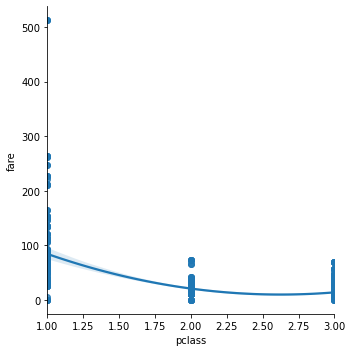

In [7]:
# Polynomial Features
df = sns.load_dataset('titanic')
#df['pclass_2'] = df['pclass'] ** 2
sns.lmplot(x='pclass', y='fare', data=df, order=2);

In [8]:
# Binary Features
df['alone'] = df['alone'].replace([True, False], [1,0])
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,1


In [9]:
# Categorical Features (Dummies or One-hot)
df = df.join(pd.get_dummies(df['embarked'], drop_first=True, prefix='embarked')).drop(columns='embarked')
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,0,0,1
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,0,0,0
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,1,0,1
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,0,0,1
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,1,0,1


In [10]:
# Ordinal Features
df['class'] = df['class'].replace(['First', 'Second', 'Third'], [1,2,3])
#df['class'] = pd.Categorical(df['class'], ordered=True, categories=['First', 'Second', 'Third']).codes
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,3,man,True,NaN,Southampton,no,0,0,1
1,1,1,female,38.0,1,0,71.2833,1,woman,False,C,Cherbourg,yes,0,0,0
2,1,3,female,26.0,0,0,7.9250,3,woman,False,NaN,Southampton,yes,1,0,1
3,1,1,female,35.0,1,0,53.1000,1,woman,False,C,Southampton,yes,0,0,1
4,0,3,male,35.0,0,0,8.0500,3,man,True,NaN,Southampton,no,1,0,1


In [11]:
# Interaction Features
df['gender_class'] = df.sex.astype(str) + '_' + df['class'].astype(str)
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_Q,embarked_S,gender_class
0,0,3,male,22.0,1,0,7.2500,3,man,True,NaN,Southampton,no,0,0,1,male_3
1,1,1,female,38.0,1,0,71.2833,1,woman,False,C,Cherbourg,yes,0,0,0,female_1
2,1,3,female,26.0,0,0,7.9250,3,woman,False,NaN,Southampton,yes,1,0,1,female_3
3,1,1,female,35.0,1,0,53.1000,1,woman,False,C,Southampton,yes,0,0,1,female_1
4,0,3,male,35.0,0,0,8.0500,3,man,True,NaN,Southampton,no,1,0,1,male_3


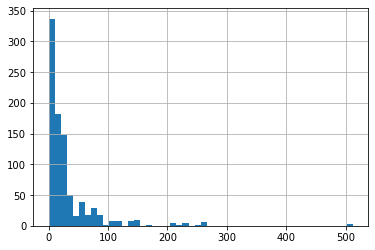

In [12]:
# Normalised Features
df['fare'].hist(bins=50);

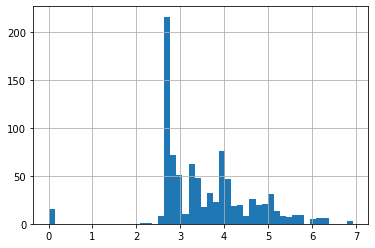

In [13]:
#df['fare'] = np.log(df['fare'] + 1).hist(bins=50);
#df.fare.apply(lambda x : (np.log(x + 1))).hist(bins=50);
#df.fare.apply(np.sqrt).hist(bins=50);
df.fare.apply(np.arcsinh).hist(bins=50);

# Regularization
For heavily engineered model and when the number of features is close to the number of observations, regularization is required to prevent overfitting. Two types are common: Lasso (L1) and Ridge (L2) regression. However, regularized regression doesn't have coefficient interpretability (statsmodels summary not available).

In [15]:
# ElasticNet is in between L1 and L2 with a parameter (with 0 being L1 and 1 being L2 and the rest in between).
#est = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.2, L1_wt=1.0)